<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/Abhijith-Nagarajan/blob/main/MP_Neuron_Perceptron_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### PadhAI Deep Learning Course ####
As part of the Deep Learning Course, I will be implementing various modules covered in the course to deepen my understanding.

##### Module 1 - MP Neuron #####

<head>
    <h3><b>Properties</b></h3>
</head>
<body>
    <div>
    <table>
        <tr> 
            <th> Data </th>
            <th> Classification Type</th>
            <th> Model </th>
            <th> Loss function </th>
            <th> Learning Algorithm </th>
            <th> Evaluation </th>
        </tr>
        <tr>
            <th> Binary Data </th>
            <th> Binary </th>
            <th> Linear </th>
            <th> y_pred = 1, iff (∑ Xi >= b)<br>
                 y_pred = 0, iff (∑ Xi <  b)<br><br>
            </th>
            <th> Brute Force</th>
            <th> Accuracy </th>
        </tr>
    </table>
    <ul> 
        <li> i ranges from 1 to n </li>
        <li> n = number of features </li>
    </ul>
    </div>
</body>

###### Code Implementation ######

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn import datasets, model_selection, metrics

In [2]:
features, target = datasets.make_classification(n_samples = 50000, 
                                  n_features = 25, 
                                  n_informative = 21,
                                  n_redundant = 4,
                                  n_repeated = 0,
                                  n_classes = 2)
print('Created a classification dataset')

Created a classification dataset


In [3]:
df = pd.DataFrame(features)

In [4]:
df.columns = [f"col_{i}" for i in range(25)]

In [5]:
df['Target'] = target

In [6]:
for col in df.drop('Target',axis=1).columns:
    partition_value = df[col].median()
    df[col] = df[col].apply(lambda row: 0 if row < partition_value else 1)

print('Binarized the input data for MP Neuron data')

Binarized the input data for MP Neuron data


In [7]:
df[df.Target==0].sample(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,Target
13996,1,0,1,0,0,1,0,1,0,0,...,1,1,1,1,1,0,1,0,0,0
22044,1,0,0,1,0,1,0,0,0,1,...,0,1,1,1,0,0,1,1,0,0
46055,1,0,1,1,1,1,0,1,1,0,...,1,1,1,1,1,0,1,0,0,0
29790,0,0,0,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,0
10888,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,0,1,0
19403,1,0,1,1,1,1,1,0,1,0,...,0,1,1,1,1,1,0,0,1,0
47280,1,1,0,0,0,1,1,0,1,1,...,1,1,1,0,1,0,1,0,1,0
47125,0,0,1,0,1,1,1,0,1,0,...,1,1,0,1,1,1,0,1,1,0
1250,1,0,0,1,1,0,1,1,1,0,...,1,0,1,1,0,0,1,1,1,0
22119,1,1,0,1,0,1,1,0,1,0,...,1,0,1,1,0,0,0,1,1,0


In [8]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df.drop('Target',axis=1), df.Target, test_size = 0.3, random_state = 42)

In [9]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def compute_loss(self,Y,Y_pred) -> int:
        return np.sum((Y-Y_pred)**2)

    def compute_accuracy(self,Y,Y_pred) -> int:
        accuracy = 0
        for index in range(len(Y)):
            if Y[index]==Y_pred[index]:
                accuracy+=1

        return 100*(accuracy/len(Y))

    def model(self,X) -> list:
        '''
        This method taken the independent features as input and compares the sum with the threshold. If the sum >=threshold, the Y_pred value = 1, else its 0. 
        It returns all the predicted values as a list.
        '''
        row_sum = X.apply(np.sum,axis=1)
        Y_pred = [1 if val>=self.b else 0 for val in row_sum]
        return Y_pred
    
    def calc_best_value(self,metric: dict,is_loss: bool) -> int:
        '''
        This method returns the best score according to the metric 
        '''
        values = list(metric.values())
        if is_loss:
            return list(metric.keys())[values.index(min(values))]
        else:
            return list(metric.keys())[values.index(max(values))]

    def plot_b_vs_metric(self, metric: dict, ylabel:str, filename: str) -> None:
        '''
        This method plots the required metric: {loss or accuracy} with the b value.
        '''
        plt.figure(figsize=(15,10))
        plt.xlabel("Threshold(b)")
        plt.ylabel(ylabel)
        plt.plot(metric.keys(),metric.values())
    
    def predict(self,X_test: pd.DataFrame) -> int:
        return self.model(X_test)
       
    def fit(self,X,Y) -> int:
        loss = {}
        accuracy = {}
        for b in range(X.shape[1]):
            print(f'Computing loss and accuracy for b = {b}')
            self.b = b
            Y_pred = self.model(X)
            loss[b] = self.compute_loss(np.array(Y),np.array(Y_pred))
            accuracy[b] = self.compute_accuracy(np.array(Y),np.array(Y_pred))

        print(f'Displaying the Threshold vs Loss plot')
        self.plot_b_vs_metric(loss,'Loss','MPNeuronLoss.png')
        print(f'Displaying the Threshold vs Accuracy plot')
        self.plot_b_vs_metric(accuracy,'Accuracy','MPNeuronAccuracy.png')
        best_b = self.calc_best_value(loss,True)
        best_accuracy = self.calc_best_value(accuracy,False)
        self.b = best_b
        return ((best_b,loss[best_b]),(best_accuracy,accuracy[best_b]))

In [10]:
mpn_model = MPNeuron()
print('Initialised MP Neuron object')

Initialised MP Neuron object


Computing loss and accuracy for b = 0
Computing loss and accuracy for b = 1
Computing loss and accuracy for b = 2
Computing loss and accuracy for b = 3
Computing loss and accuracy for b = 4
Computing loss and accuracy for b = 5
Computing loss and accuracy for b = 6
Computing loss and accuracy for b = 7
Computing loss and accuracy for b = 8
Computing loss and accuracy for b = 9
Computing loss and accuracy for b = 10
Computing loss and accuracy for b = 11
Computing loss and accuracy for b = 12
Computing loss and accuracy for b = 13
Computing loss and accuracy for b = 14
Computing loss and accuracy for b = 15
Computing loss and accuracy for b = 16
Computing loss and accuracy for b = 17
Computing loss and accuracy for b = 18
Computing loss and accuracy for b = 19
Computing loss and accuracy for b = 20
Computing loss and accuracy for b = 21
Computing loss and accuracy for b = 22
Computing loss and accuracy for b = 23
Computing loss and accuracy for b = 24
Displaying the Threshold vs Loss pl

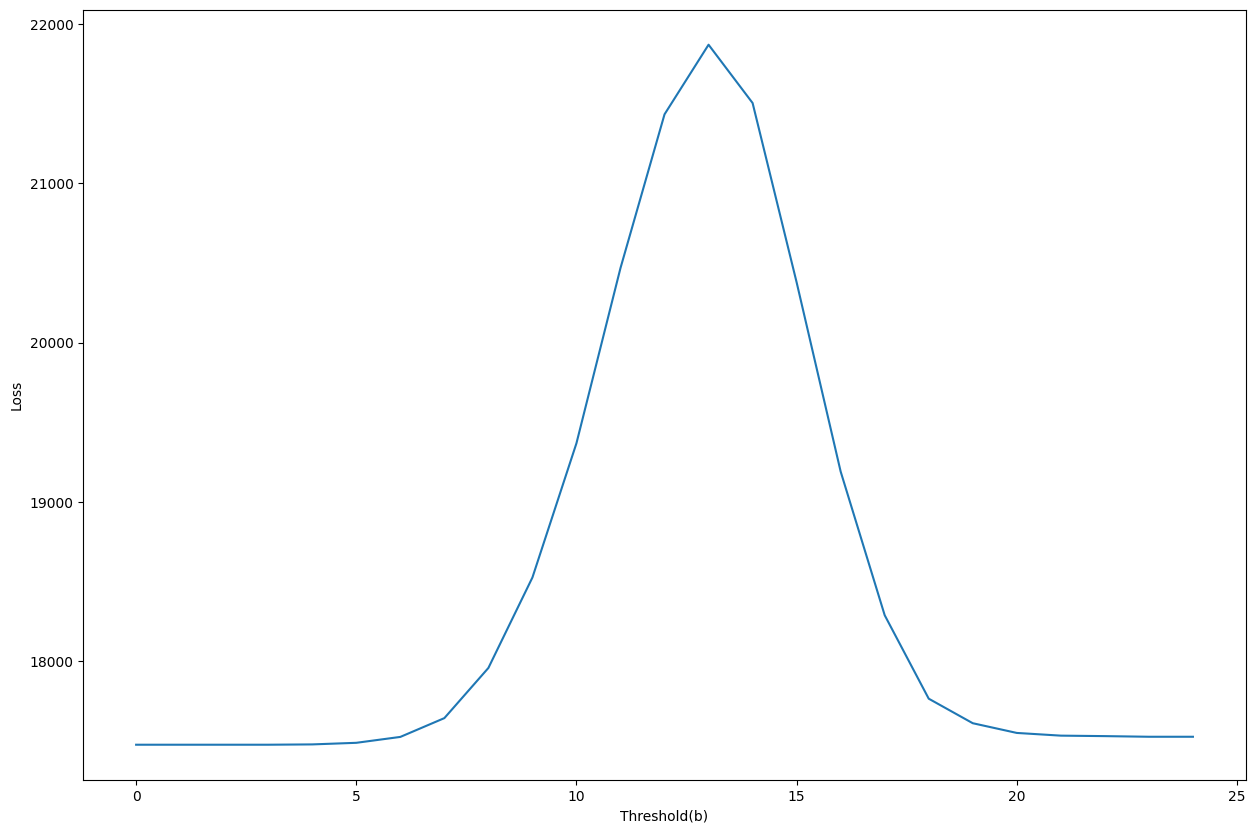

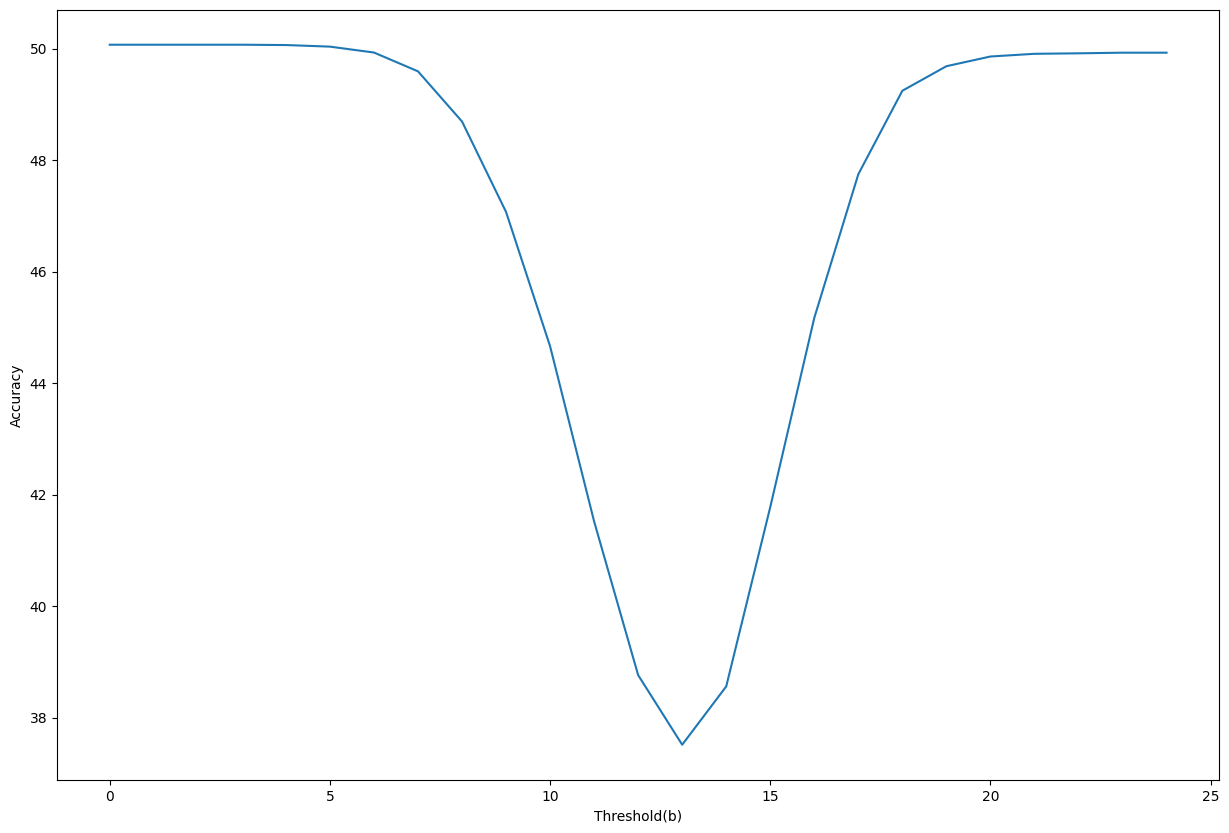

In [11]:
b, accuracy = mpn_model.fit(X_train,Y_train)

In [12]:
print(f'Training set least loss: {b[1]}')

Training set least loss: 17475


In [13]:
print(f'Training set best accuracy: {accuracy[1]}')

Training set best accuracy: 50.07142857142857


In [14]:
Y_pred_test = mpn_model.predict(X_test)

In [15]:
print(f'Test set loss: {mpn_model.compute_loss(np.array(Y_test),np.array(Y_pred_test))}')

Test set loss: 7558


In [16]:
print(f'Test set accuracy: {mpn_model.compute_accuracy(np.array(Y_test),np.array(Y_pred_test))}')

Test set accuracy: 49.61333333333333


##### It can be observed that the MP Neuron model performs poorly, as it can only accept binary input. Furthermore, the model does not learn from incorrect predictions, and the only means to attain the threshold is via brute-force. Proceeding to the Perceptron implementation.

##### Module 2 - Perceptron #####

<head>
    <h3><b>Properties</b></h3>
</head>
<body>
    <div>
    <table>
        <tr> 
            <th> Data </th>
            <th> Classification Type</th>
            <th> Model </th>
            <th> Loss function </th>
            <th> Learning Algorithm </th>
            <th> Evaluation </th>
        </tr>
        <tr>
            <th> Real Data </th>
            <th> Binary </th>
            <th> Linear </th>
            <th> y_pred = 1, iff (∑ WiXi >= b)<br>
                 y_pred = 0, iff (∑ WiXi <  b)<br><br>
            </th>
            <th> </th>
            <th> Accuracy </th>
        </tr>
    </table>
    <ul> 
        <li> i ranges from 1 to n </li>
        <li> n = number of features </li>
        <li> W = Weights vector randomly initialized </li>
    </ul>
    </div>
</body>

###### Code Implementation ######

In [17]:
breast_cancer_data = datasets.load_breast_cancer(as_frame=True)

In [18]:
df = breast_cancer_data.data
df['Target'] = breast_cancer_data.target

In [19]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
numerical_cols = list(df.select_dtypes('float64').columns)

In [22]:
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric,downcast='float',errors='coerce')

In [23]:
original_cols = list(df.columns)
original_cols.remove('Target')

In [24]:
cols = [col.replace(" ","_") for col in df.columns if " " in col and col!='Target'] 

In [25]:
cols_to_rename = dict(zip(original_cols,cols))

In [26]:
df = df.rename(columns=cols_to_rename)

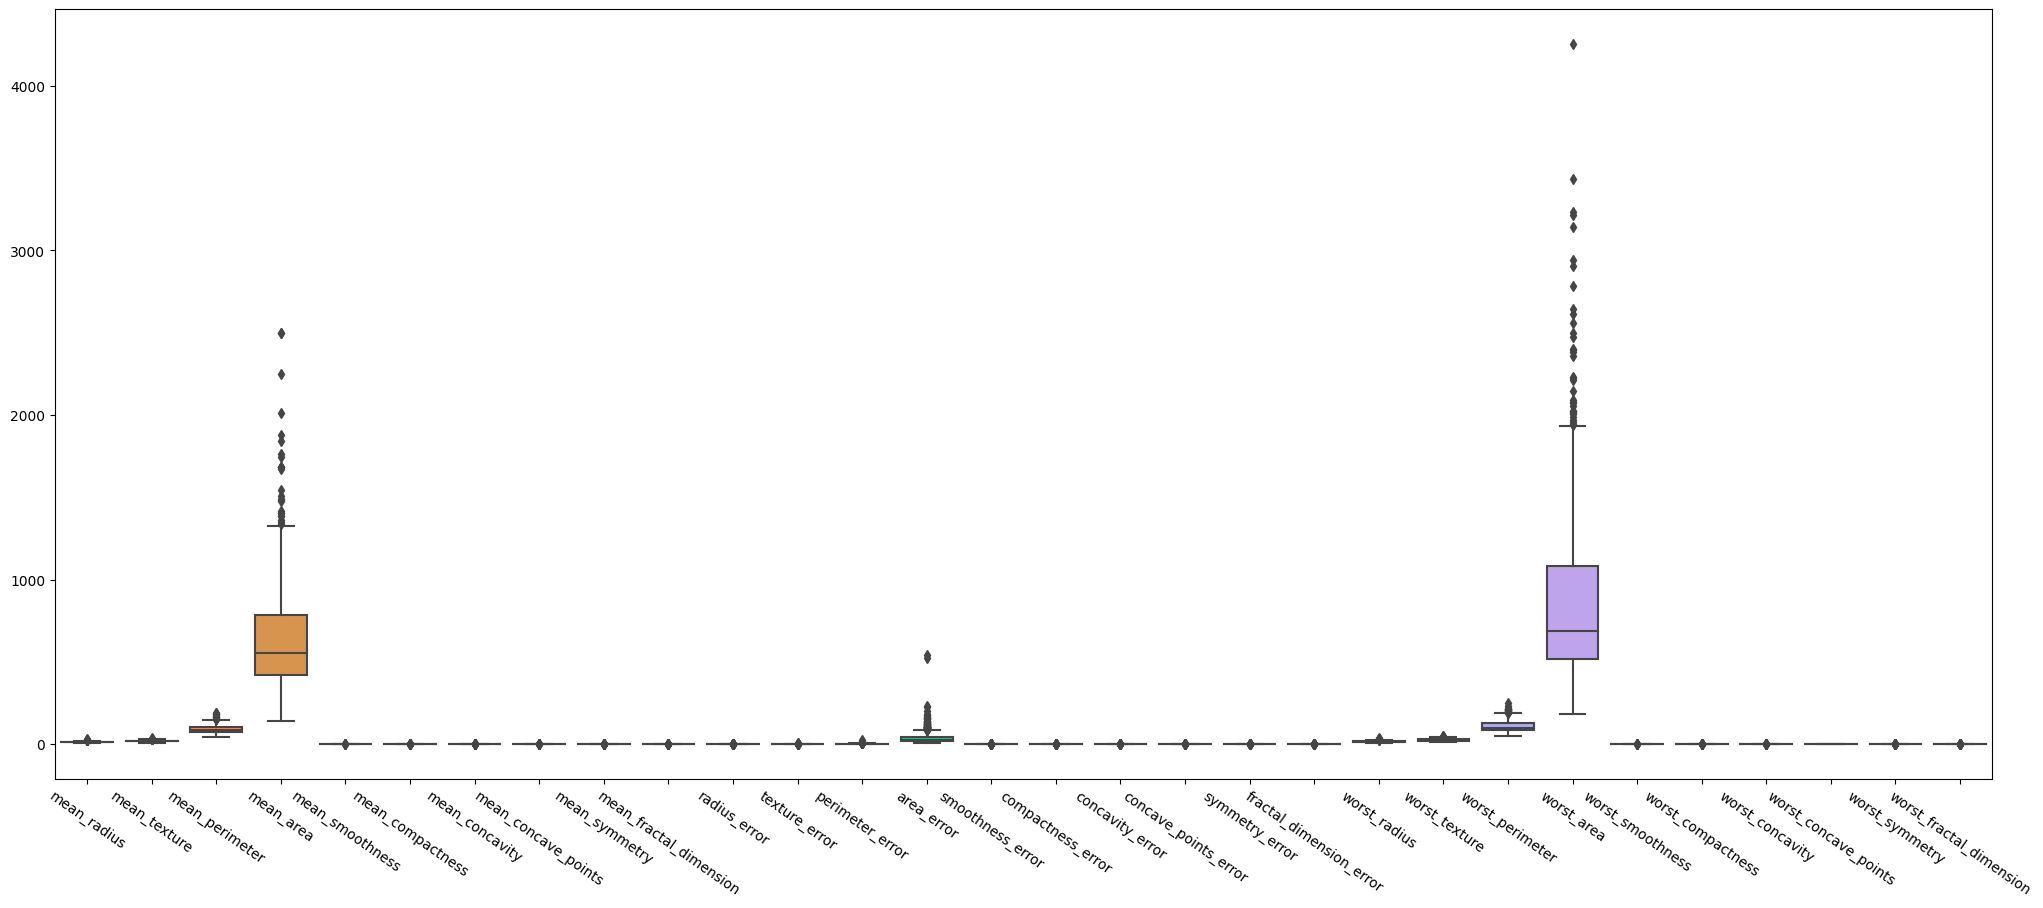

In [27]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df.drop(['Target'],axis=1))
plt.xticks(rotation=325)
plt.show()

<h4> Since the data for the perceptron model needs to be standardized, the standardization() from sklearn will be used on four columns: <b>mean_area, area_error, worst_perimeter, and worst_area.</b></h4>

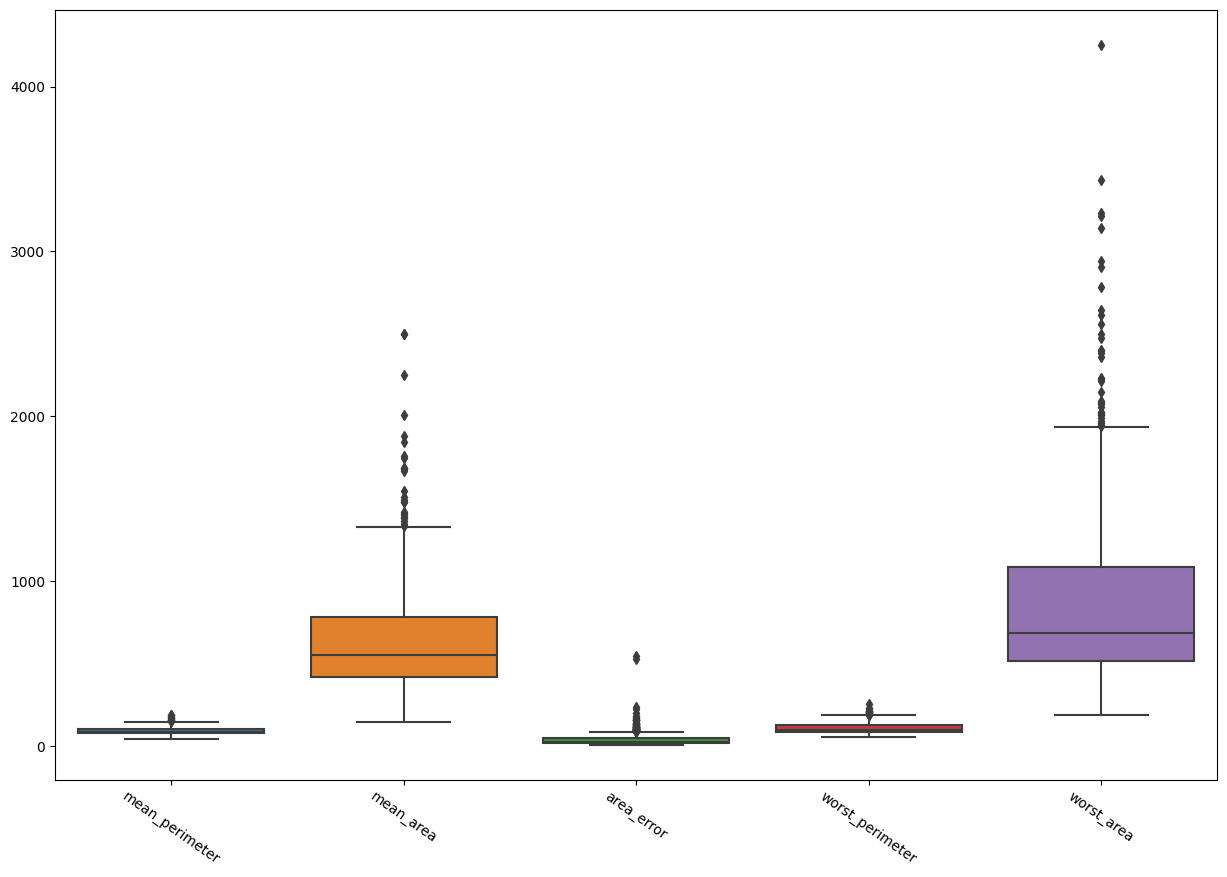

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['mean_perimeter','mean_area', 'area_error','worst_perimeter','worst_area']])
plt.xticks(rotation=325)
plt.show()

In [29]:
for col in ['mean_perimeter','mean_area','area_error','worst_perimeter','worst_area']:
    median_value = df[col].median()
    df[col] = df[col].apply(lambda row: 1 if row>median_value else 0)

In [30]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df.drop('Target',axis=1),df.Target,test_size=0.3,random_state=42)

In [31]:
class Perceptron:
    def __init__(self,no_of_features):
        self.weights = np.random.rand(no_of_features)
        self.b = None
    
    def compute_accuracy(self,Y,Y_pred)->float:
        accuracy = sum([1 if Y[index] == Y_pred[index] else 0 for index in range(len(Y))])
        return 100.0*(accuracy/len(Y))

    def compute_loss(self,Y: np.array,Y_pred: np.array)->float:
        Y_temp = 1-Y*Y_pred
        return sum([1 if val>0 else 0 for val in Y_temp])
    
    def plot_epoch_vs_metric(self,metric:dict,y_label:str)->None:
        plt.figure(figsize=(10,3))
        plt.plot(metric.keys(),metric.values())
        plt.xlabel('Epoch')
        plt.ylabel(y_label)
        plt.show()

    def model(self,X)->int:
        row_sum = np.sum(np.dot(X,self.weights))
        return 1 if row_sum>=self.b else 0

    def fit(self,X_train,Y_train,epochs: int)->list:
        loss = {}
        accuracy = {}
        self.b = 0
        weights = {}
        b = {}

        for epoch in range(1,epochs+1):
            Y_pred = []
            for x,y in zip(X_train.values,Y_train.values):
                Y_pred_val = self.model(x)
                Y_pred.append(Y_pred_val)

                if y==1 and Y_pred_val==0:
                    self.weights+=np.array(x)
                    self.b+=1
                
                elif y==0 and Y_pred_val==1:
                    self.weights-=np.array(x)
                    self.b-=1
        
            loss[epoch] = self.compute_loss(np.array(Y_train),np.array(Y_pred))
            accuracy[epoch] = float(format(self.compute_accuracy(np.array(Y_train),np.array(Y_pred)),".4f"))
            weights[epoch] = self.weights
            b[epoch] = self.b
                      
        print(f'Displaying the epoch vs loss graph')
        self.plot_epoch_vs_metric(loss,'Loss')
        print(f'Displaying the epoch vs Accuracy graph')
        self.plot_epoch_vs_metric(accuracy,'Accuracy')
        
        best_loss_epoch= min(loss, key = loss.get)
        best_accuracy_epoch = max(accuracy, key = accuracy.get)

        print(f'Epoch: {best_loss_epoch}\nOptimum loss: {loss[best_loss_epoch]}')
        print(f'Epoch: {best_accuracy_epoch}\nBest Accuracy: {accuracy[best_accuracy_epoch]}')

        self.b = b[best_loss_epoch]
        self.weights = weights[best_loss_epoch]

    def predict(self,X_test)->list:  
        Y_pred_test = []
        for x in X_test.values:
            Y_pred_test.append(self.model(x))
        
        return Y_pred_test

In [32]:
perceptron_model = Perceptron(X_train.shape[1])

Displaying the epoch vs loss graph


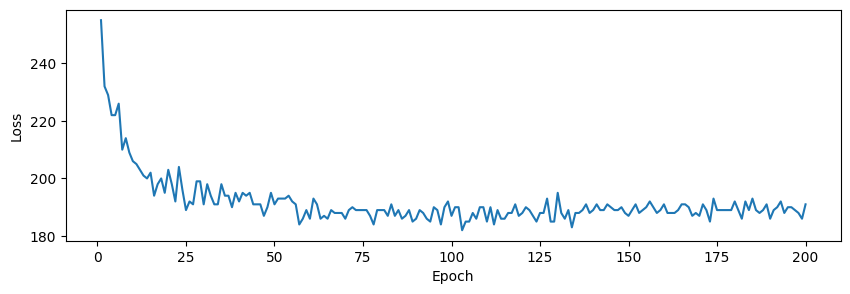

Displaying the epoch vs Accuracy graph


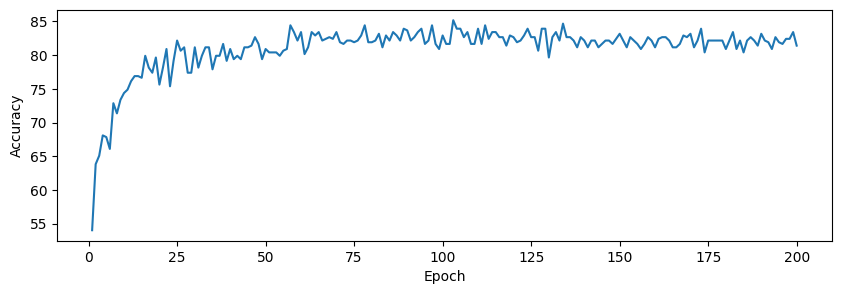

Epoch: 103
Optimum loss: 182
Epoch: 103
Best Accuracy: 85.1759


In [33]:
Y_pred = perceptron_model.fit(X_train,Y_train,200)

In [34]:
perceptron_model.weights

array([ 948.22931322,  265.20453212, -730.21083356, -577.12322527,
        142.82023325,    1.2631224 , -323.70062139, -193.16420032,
        252.57848958,  131.4228605 , -188.47404774,  976.85569001,
       -582.52753434, -151.74435982,    7.04555232,   23.64498457,
         14.1353568 ,    2.64799508,   28.58529257,    6.87477444,
       -557.99399573, -196.13108095, -220.68877824, -728.68116355,
        149.93365183,  -94.33576973, -529.10092703, -199.09911472,
        261.83386971,  130.28308567])

In [35]:
perceptron_model.b

1044

In [36]:
Y_pred_test = perceptron_model.predict(X_test)

In [37]:
print(f'Test loss: {perceptron_model.compute_loss(np.array(Y_test),np.array(Y_pred_test))}')

Test loss: 63


In [38]:
print(f'Test accuracy: {perceptron_model.compute_accuracy(np.array(Y_test),np.array(Y_pred_test))}')

Test accuracy: 85.96491228070175
